In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Load the dataset into a pandas DataFrame
file_path = 'delhi_aqi.csv'
scaled_df = pd.read_csv(file_path,parse_dates=True)

# Inspect the first few rows of the DataFrame
scaled_df.head()

# Scale Data
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Extract the 'date' column
date_column = scaled_df.iloc[:, 0]

# Scale the data (excluding the first column which is 'date')
scaled_values = scaler.fit_transform(scaled_df.iloc[:, 1:])

# Create a new DataFrame with the scaled values and the original 'date' column
scaled_df = pd.DataFrame(scaled_values, columns=scaled_df.columns[1:])
scaled_df.insert(0, 'date', date_column.reset_index(drop=True))

# Inspect the first few rows of the scaled DataFrame
scaled_df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,0.112816,0.004354,0.145330,0.016964,0.058077,0.207975,0.202910,0.099489
1,2020-11-25 02:00:00,0.161393,0.046437,0.185892,0.000412,0.085471,0.241195,0.241010,0.142614
2,2020-11-25 03:00:00,0.204858,0.105357,0.209931,0.001386,0.110376,0.266380,0.269523,0.170761
3,2020-11-25 04:00:00,0.204858,0.101782,0.233948,0.008039,0.126962,0.261151,0.265456,0.167252
4,2020-11-25 05:00:00,0.197188,0.085723,0.248981,0.021433,0.143566,0.257219,0.262996,0.161970


In [4]:
# Check Stationarity using ADF Test
def adf_test(series, column_name):
    result = adfuller(series)
    print(f'ADF Statistic for {column_name}: {result[0]}')
    print(f'p-value for {column_name}: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Perform ADF test for each column except the first one
for column in scaled_df.columns[1:]:
    adf_test(scaled_df[column], column)

# Plot ACF and PACF for each column except the first one

ADF Statistic for co: -11.042789123447207
p-value for co: 5.31405803518463e-20
Critical Values:
   1%: -3.430699164293836
   5%: -2.861694317770355
   10%: -2.5668521392325716
ADF Statistic for no: -12.369044252013442
p-value for no: 5.332590214810978e-23
Critical Values:
   1%: -3.430699182938372
   5%: -2.861694326010069
   10%: -2.5668521436184357
ADF Statistic for no2: -10.66350059608821
p-value for no2: 4.346277194669769e-19
Critical Values:
   1%: -3.430699182938372
   5%: -2.861694326010069
   10%: -2.5668521436184357
ADF Statistic for o3: -7.731329032175945
p-value for o3: 1.1233401954515676e-11
Critical Values:
   1%: -3.430699182938372
   5%: -2.861694326010069
   10%: -2.5668521436184357
ADF Statistic for so2: -14.148845150477642
p-value for so2: 2.1798588778118994e-26
Critical Values:
   1%: -3.430699182938372
   5%: -2.861694326010069
   10%: -2.5668521436184357
ADF Statistic for pm2_5: -9.78245249306324
p-value for pm2_5: 6.677426115514226e-17
Critical Values:
   1%: -3.4

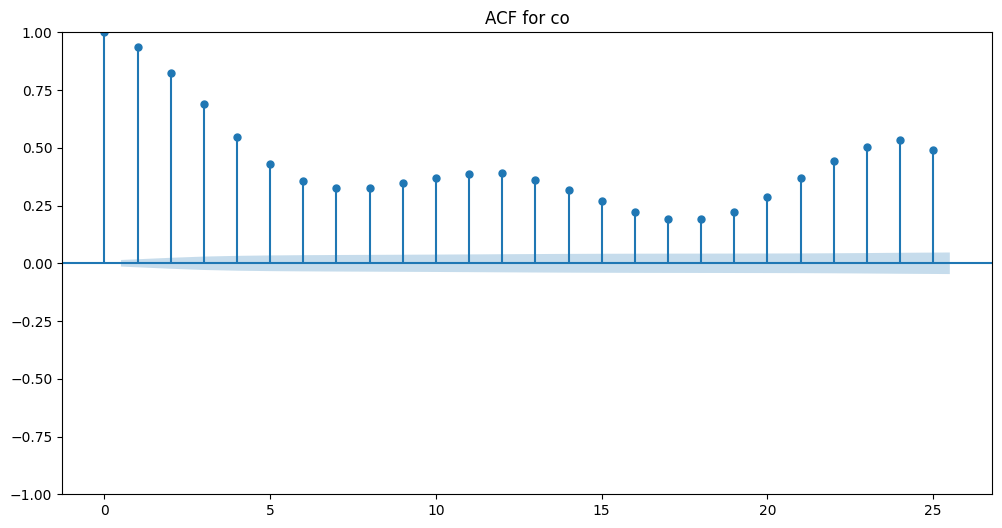

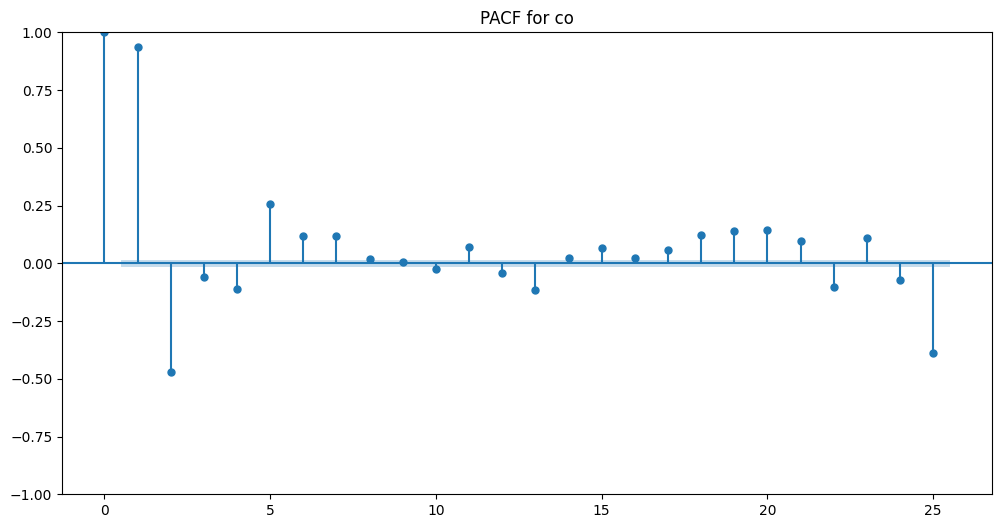

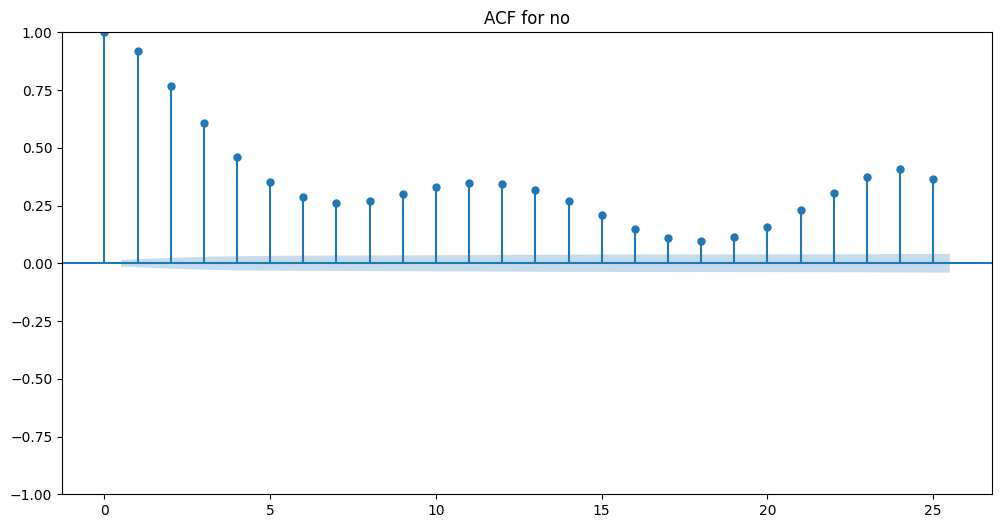

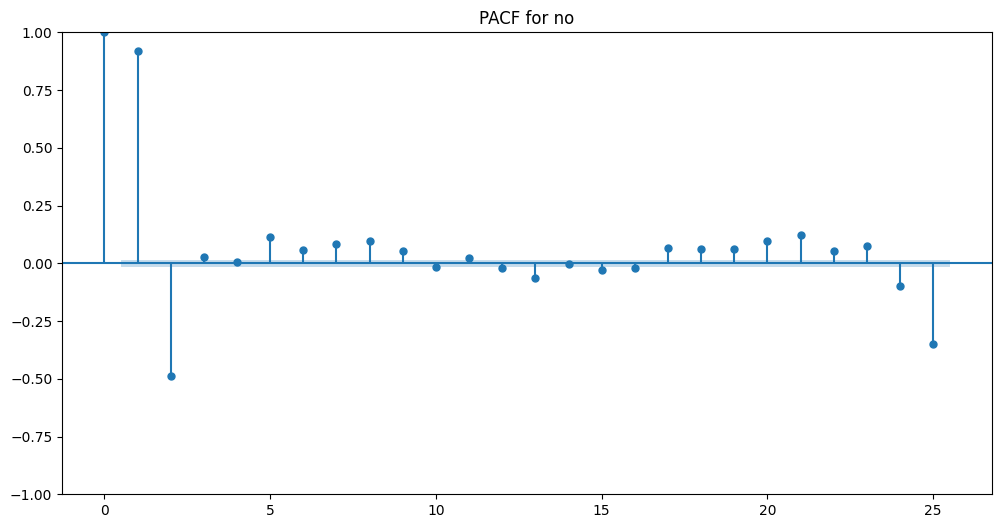

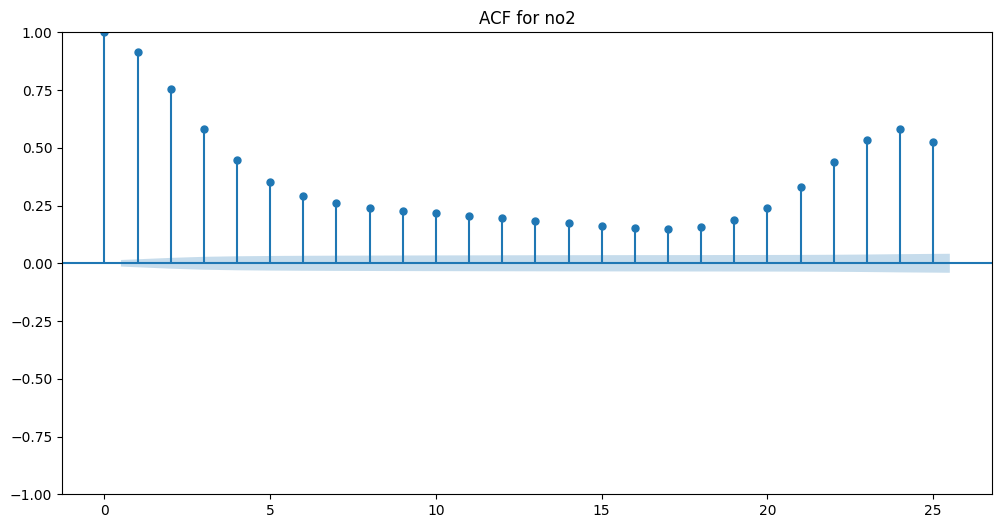

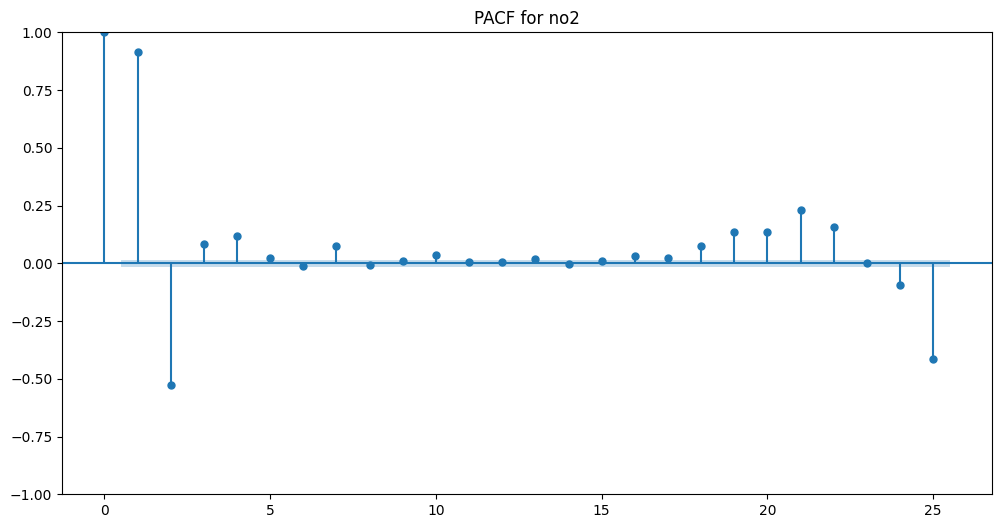

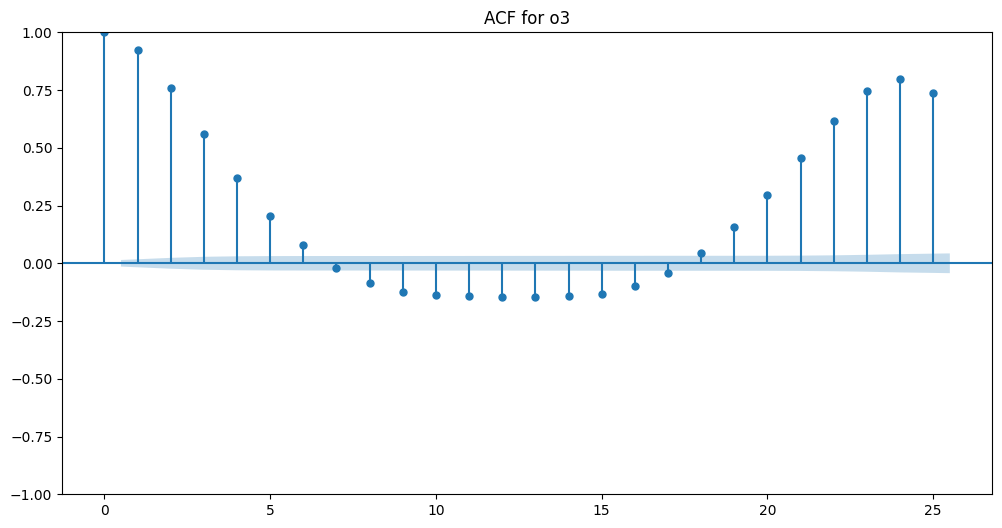

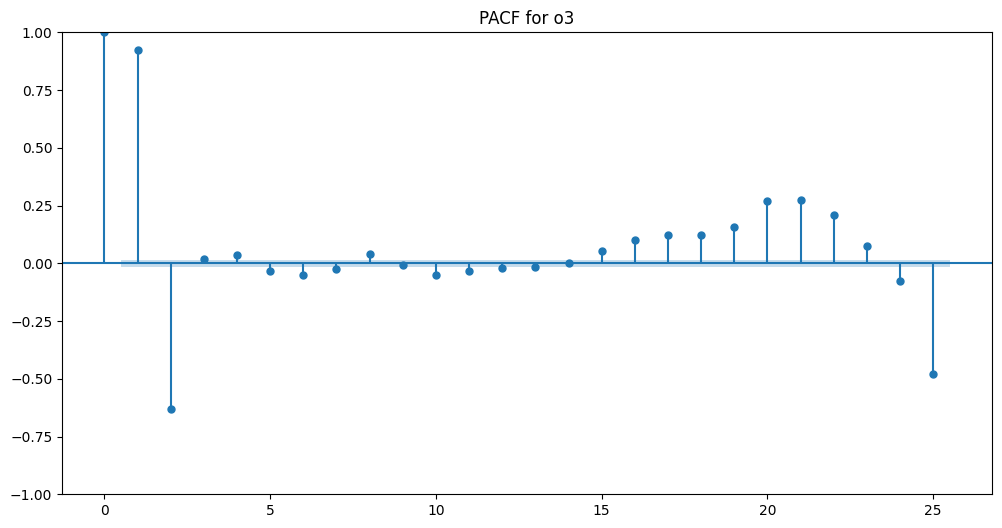

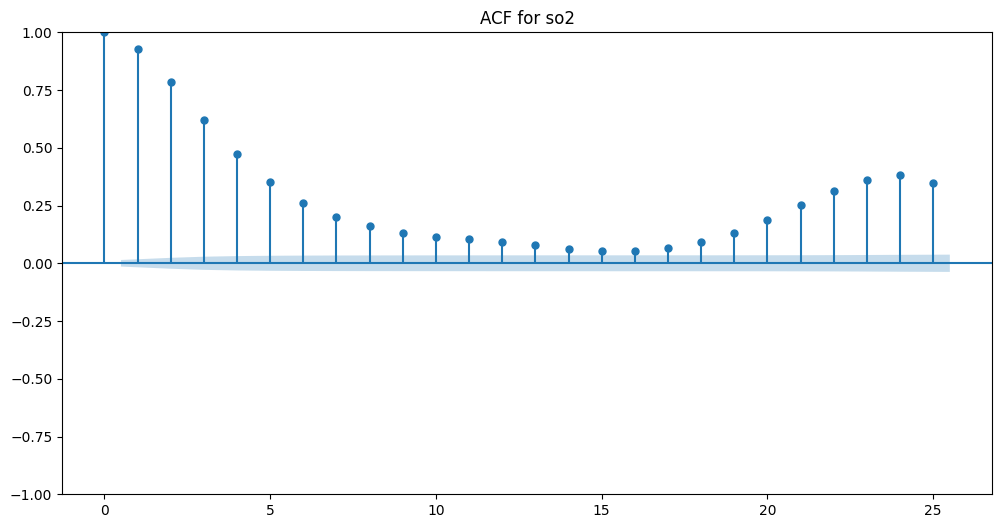

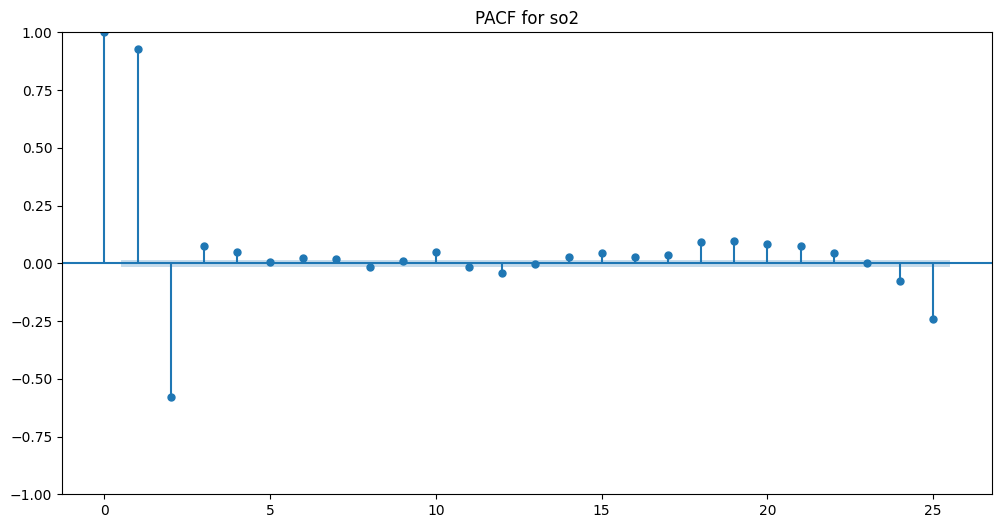

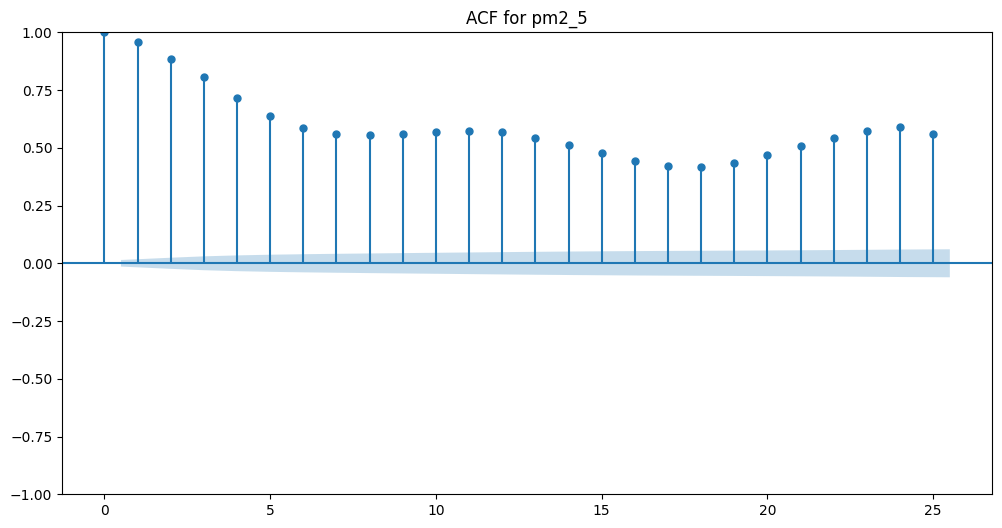

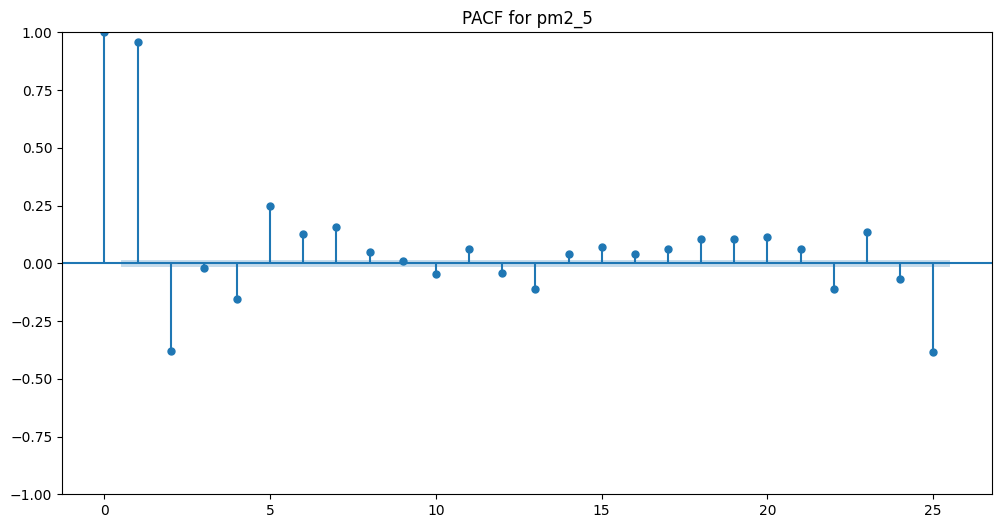

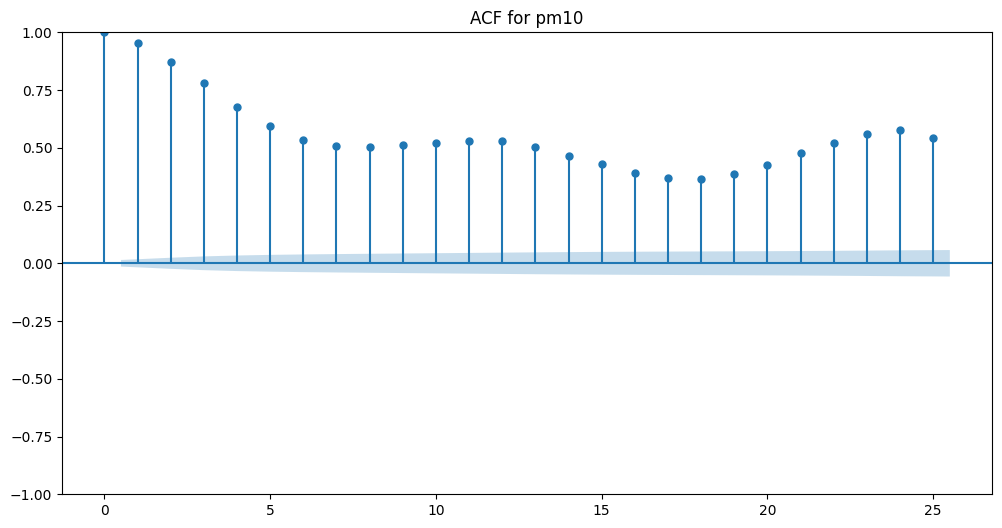

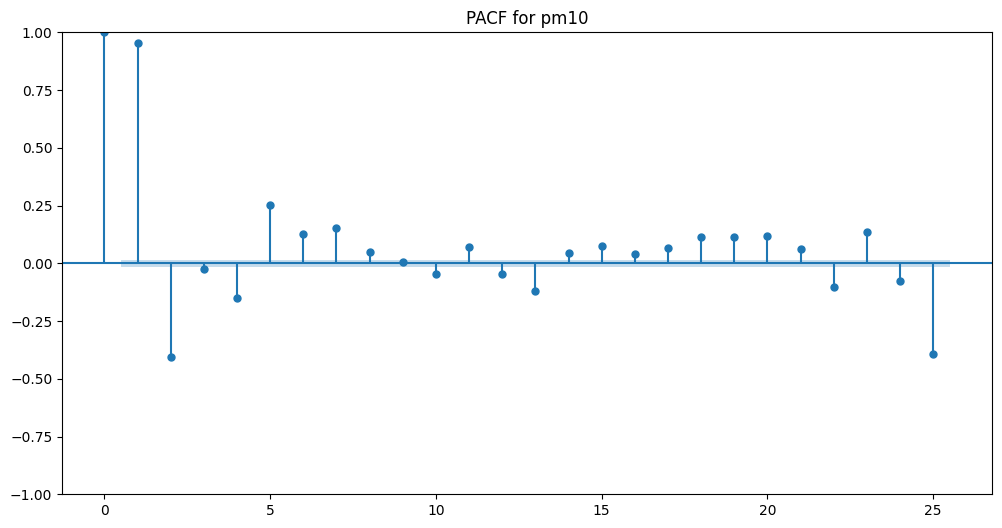

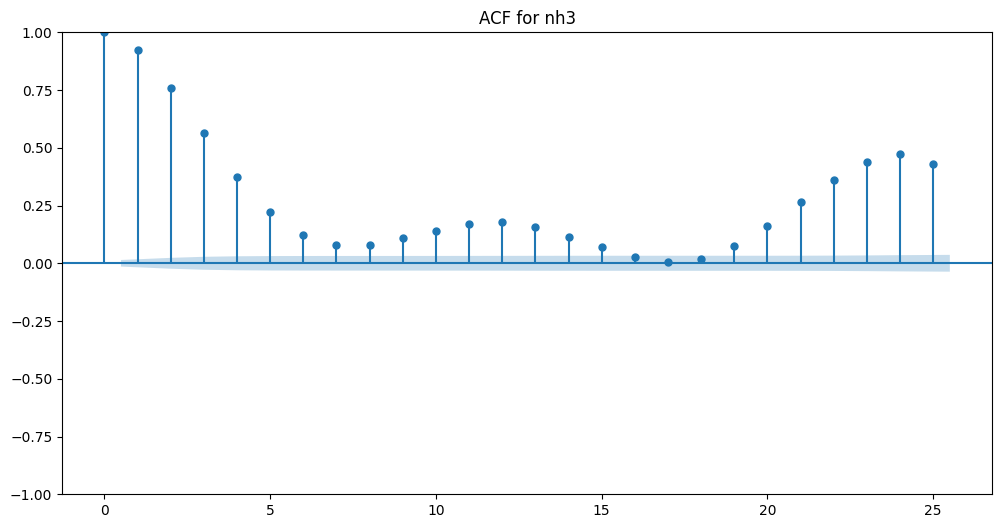

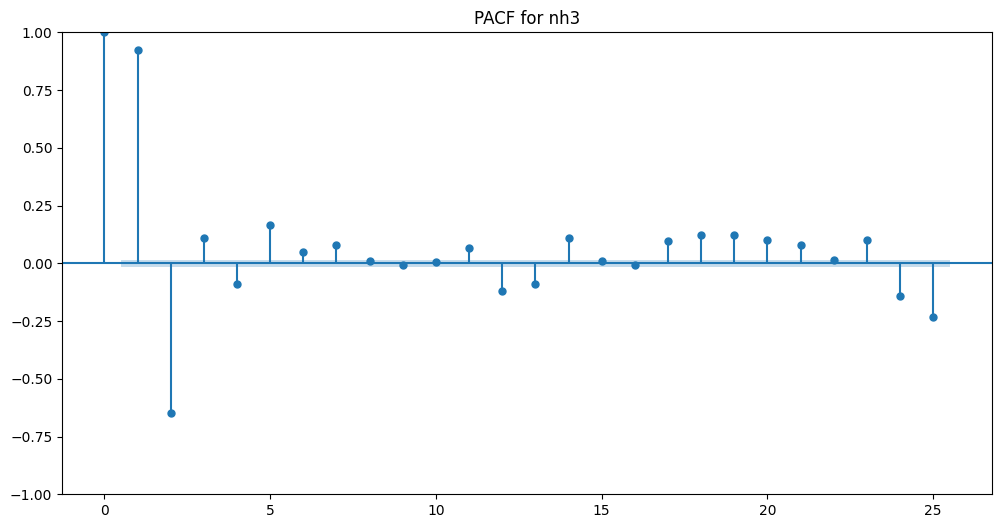

In [5]:
for column in scaled_df.columns[1:]:
    plt.figure(figsize=(12, 6))
    plot_acf(scaled_df[column], lags=25, ax=plt.gca())
    plt.title(f'ACF for {column}')
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_pacf(scaled_df[column], lags=25, ax=plt.gca())
    plt.title(f'PACF for {column}')
    plt.show()


AR Model Summary for co:
                            AutoReg Model Results                             
Dep. Variable:                     co   No. Observations:                18776
Model:                     AutoReg(2)   Log Likelihood               32940.626
Method:               Conditional MLE   S.D. of innovations              0.042
Date:                Thu, 12 Dec 2024   AIC                         -65873.252
Time:                        13:35:02   BIC                         -65841.891
Sample:                             2   HQIC                        -65862.960
                                18776                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0117      0.000     27.656      0.000       0.011       0.012
co.L1          1.3782      0.006    213.871      0.000       1.366       1.391
co.L2         -0.4694      

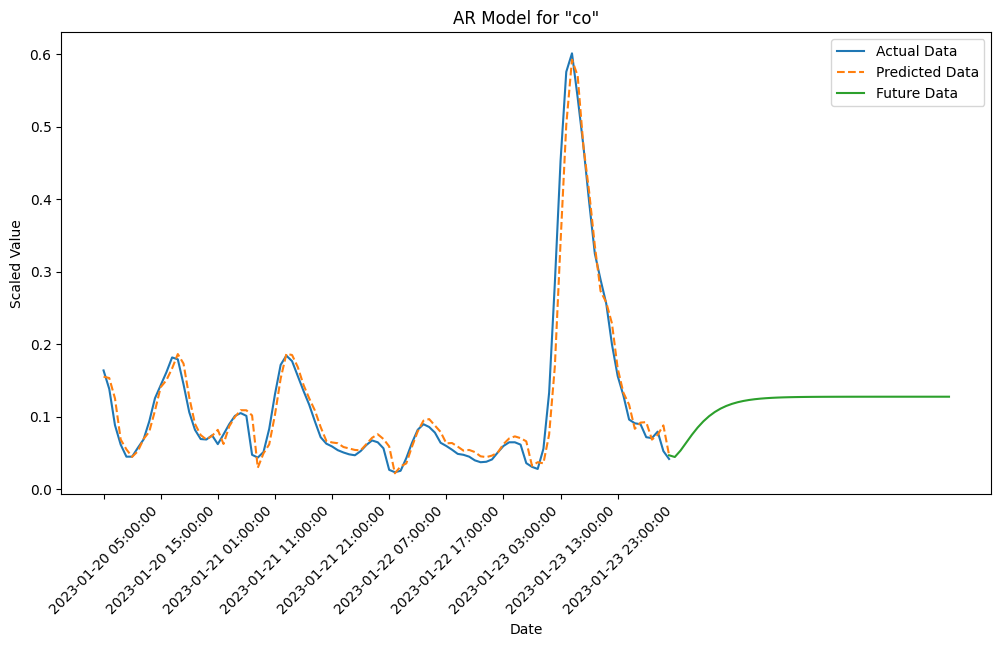

AR Model Summary for no:
                            AutoReg Model Results                             
Dep. Variable:                     no   No. Observations:                18776
Model:                     AutoReg(2)   Log Likelihood               32577.935
Method:               Conditional MLE   S.D. of innovations              0.043
Date:                Thu, 12 Dec 2024   AIC                         -65147.871
Time:                        13:35:02   BIC                         -65116.510
Sample:                             2   HQIC                        -65137.579
                                18776                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0.000     22.750      0.000       0.007       0.009
no.L1          1.3680      0.006    214.800      0.000       1.355       1.380
no.L2         -0.4884      

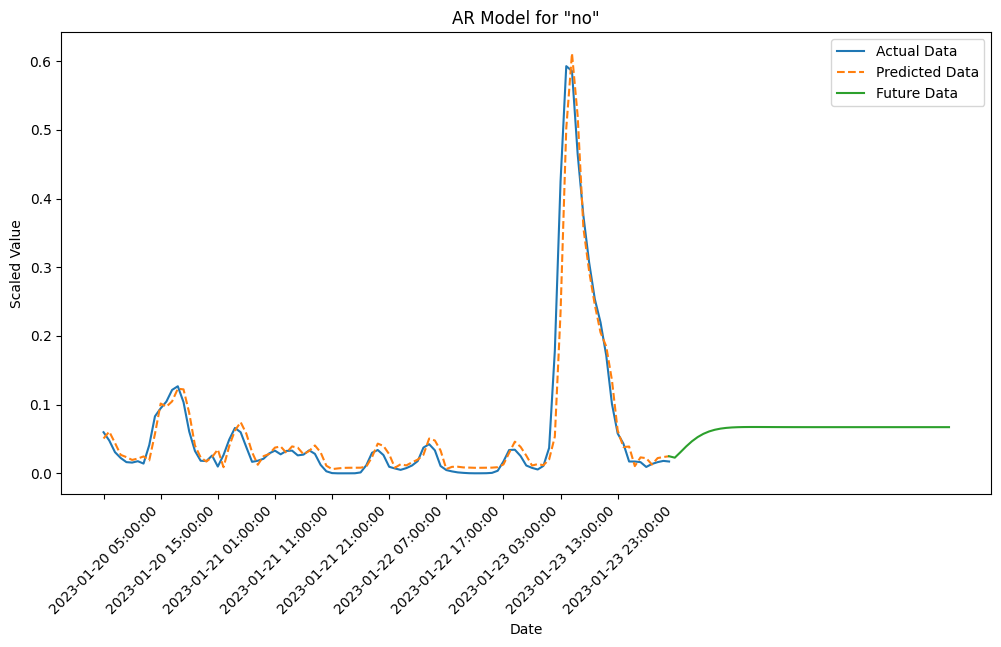

AR Model Summary for no2:
                            AutoReg Model Results                             
Dep. Variable:                    no2   No. Observations:                18776
Model:                     AutoReg(2)   Log Likelihood               35654.773
Method:               Conditional MLE   S.D. of innovations              0.036
Date:                Thu, 12 Dec 2024   AIC                         -71301.546
Time:                        13:35:02   BIC                         -71270.186
Sample:                             2   HQIC                        -71291.255
                                18776                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0173      0.000     39.927      0.000       0.016       0.018
no2.L1         1.3984      0.006    225.344      0.000       1.386       1.411
no2.L2        -0.5262     

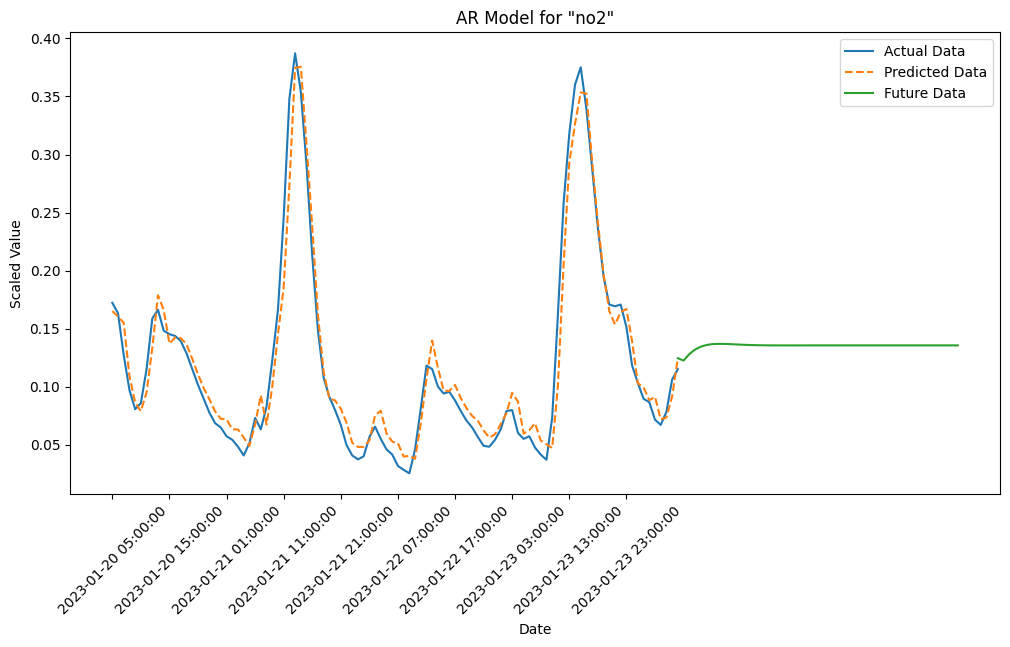

AR Model Summary for o3:
                            AutoReg Model Results                             
Dep. Variable:                     o3   No. Observations:                18776
Model:                     AutoReg(2)   Log Likelihood               39188.871
Method:               Conditional MLE   S.D. of innovations              0.030
Date:                Thu, 12 Dec 2024   AIC                         -78369.743
Time:                        13:35:03   BIC                         -78338.382
Sample:                             2   HQIC                        -78359.451
                                18776                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.000     34.531      0.000       0.009       0.010
o3.L1          1.5062      0.006    266.481      0.000       1.495       1.517
o3.L2         -0.6326      

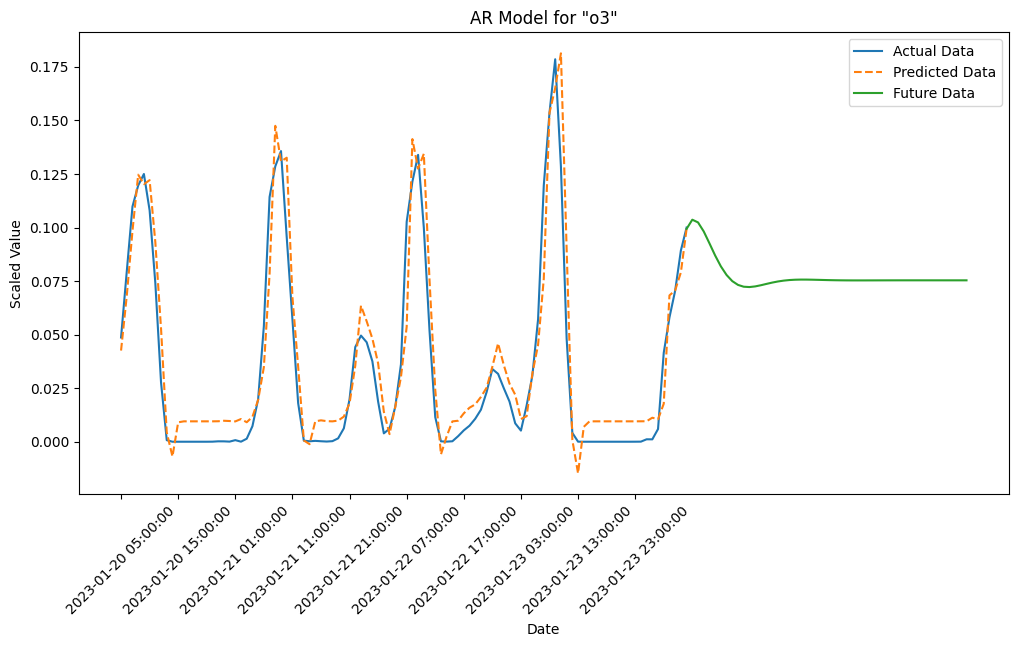

AR Model Summary for so2:
                            AutoReg Model Results                             
Dep. Variable:                    so2   No. Observations:                18776
Model:                     AutoReg(2)   Log Likelihood               41976.121
Method:               Conditional MLE   S.D. of innovations              0.026
Date:                Thu, 12 Dec 2024   AIC                         -83944.241
Time:                        13:35:03   BIC                         -83912.880
Sample:                             2   HQIC                        -83933.949
                                18776                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.000     39.083      0.000       0.011       0.012
so2.L1         1.4678      0.006    246.692      0.000       1.456       1.479
so2.L2        -0.5791     

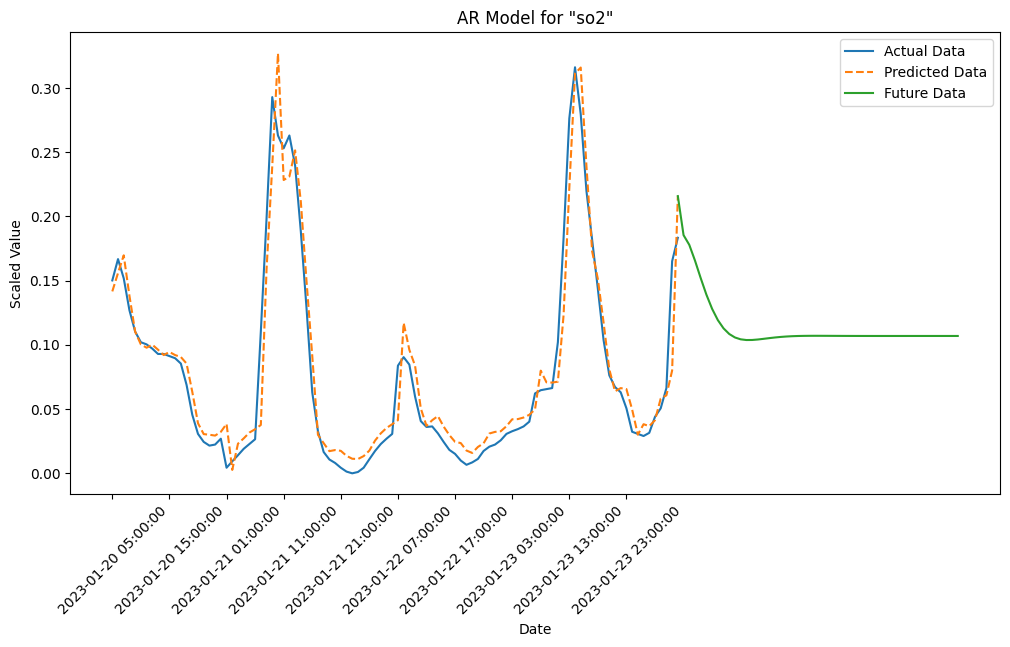

AR Model Summary for pm2_5:
                            AutoReg Model Results                             
Dep. Variable:                  pm2_5   No. Observations:                18776
Model:                     AutoReg(2)   Log Likelihood               35978.128
Method:               Conditional MLE   S.D. of innovations              0.036
Date:                Thu, 12 Dec 2024   AIC                         -71948.256
Time:                        13:35:04   BIC                         -71916.895
Sample:                             2   HQIC                        -71937.964
                                18776                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0078      0.000     21.133      0.000       0.007       0.009
pm2_5.L1       1.3212      0.007    195.698      0.000       1.308       1.334
pm2_5.L2      -0.3798   

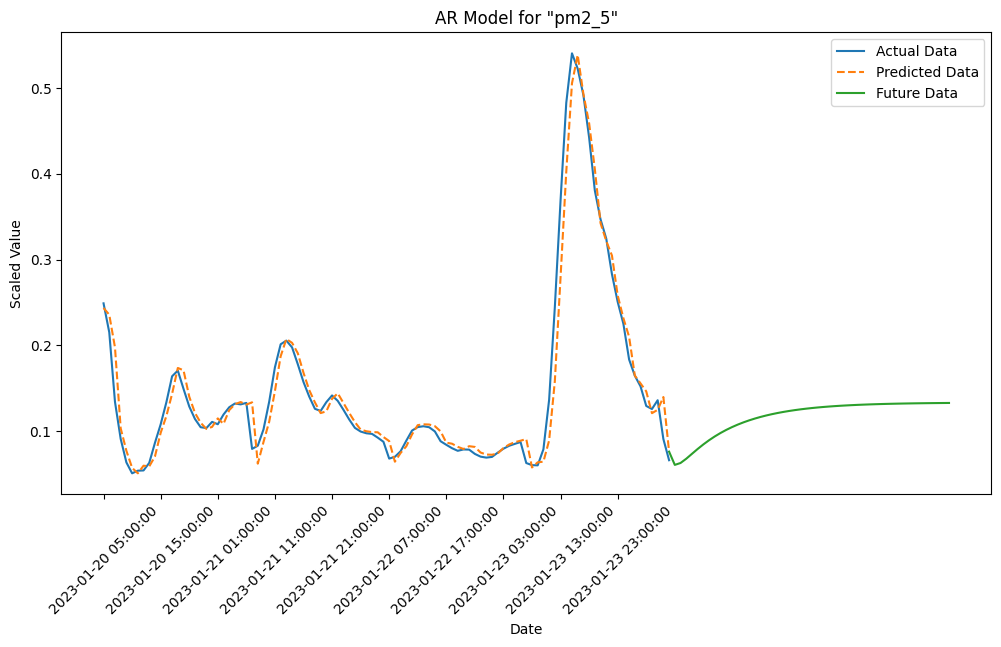

AR Model Summary for pm10:
                            AutoReg Model Results                             
Dep. Variable:                   pm10   No. Observations:                18776
Model:                     AutoReg(2)   Log Likelihood               34896.878
Method:               Conditional MLE   S.D. of innovations              0.038
Date:                Thu, 12 Dec 2024   AIC                         -69785.755
Time:                        13:35:05   BIC                         -69754.394
Sample:                             2   HQIC                        -69775.463
                                18776                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.000     23.583      0.000       0.009       0.010
pm10.L1        1.3398      0.007    200.813      0.000       1.327       1.353
pm10.L2       -0.4053    

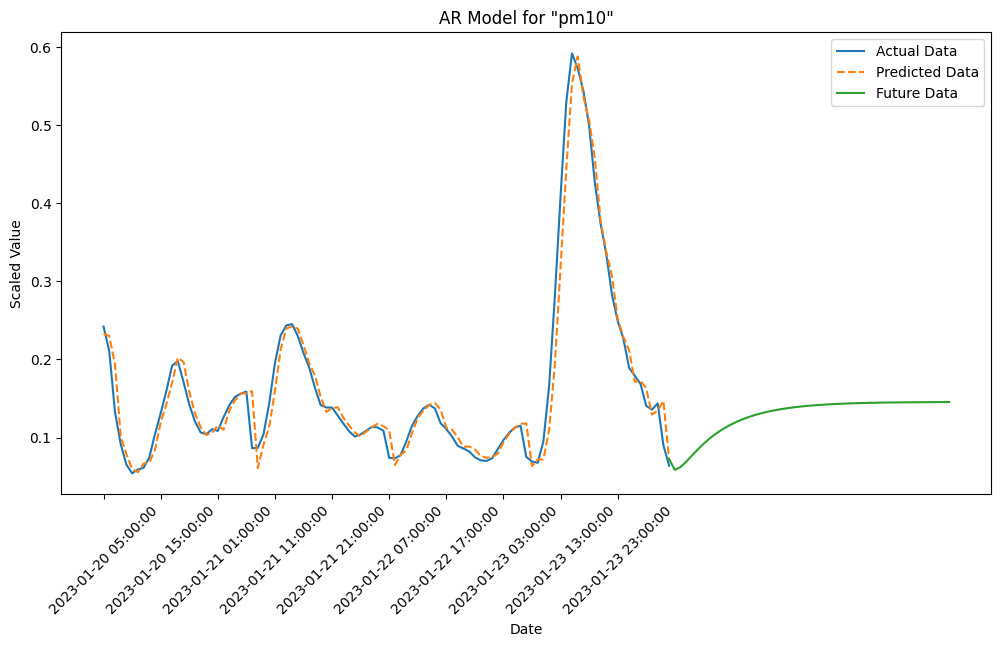

AR Model Summary for nh3:
                            AutoReg Model Results                             
Dep. Variable:                    nh3   No. Observations:                18776
Model:                     AutoReg(2)   Log Likelihood               41329.002
Method:               Conditional MLE   S.D. of innovations              0.027
Date:                Thu, 12 Dec 2024   AIC                         -82650.005
Time:                        13:35:06   BIC                         -82618.644
Sample:                             2   HQIC                        -82639.713
                                18776                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.000     40.384      0.000       0.010       0.012
nh3.L1         1.5227      0.006    274.148      0.000       1.512       1.534
nh3.L2        -0.6487     

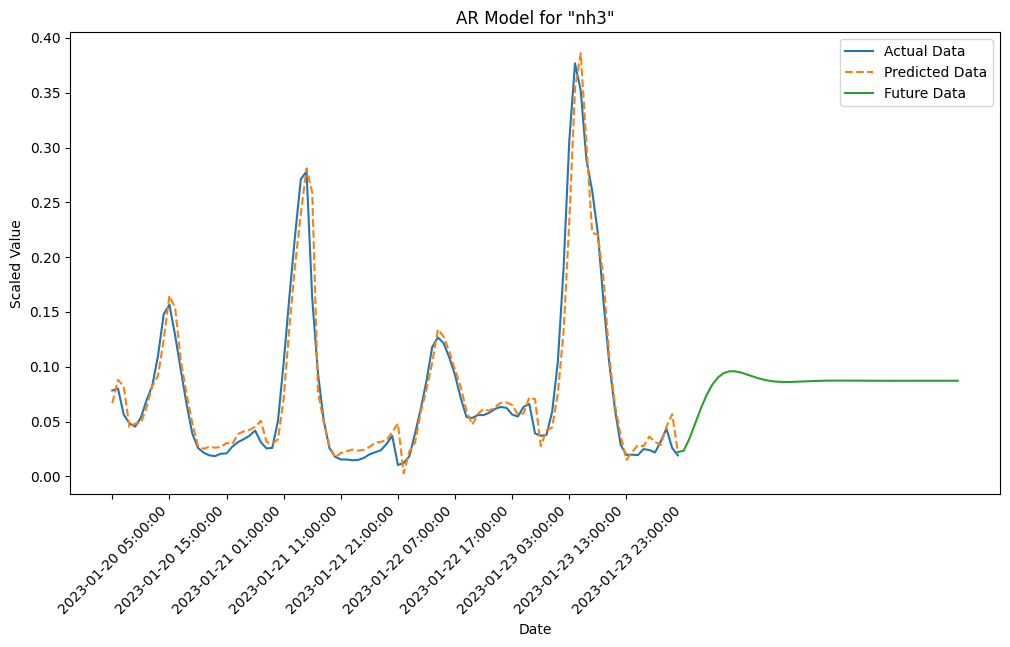

In [7]:
# Fit AR Model for Each Column
scaled_df['date'] = pd.to_datetime(scaled_df['date'])

for column in scaled_df.columns[1:]:
    # Fit the AR model for the specified column
    model = AutoReg(scaled_df[column], lags=2)
    model_fit = model.fit()

    # Print the summary of the model
    print(f'AR Model Summary for {column}:')
    print(model_fit.summary())

    # Prediction
    prediction = model_fit.predict(start=len(scaled_df)-100, end=len(scaled_df)-1)
    future=model_fit.predict(start=len(scaled_df)-1, end=len(scaled_df)+48)

    # Extend the date range for future predictions
    future_dates = pd.date_range(start=scaled_df['date'].iloc[-1]  , periods=50,freq='h')

    plt.figure(figsize=(12, 6))
    # Plot the actual data for last 100 days and the predicted data
    plt.plot(scaled_df['date'].tail(100), scaled_df[column].tail(100), label='Actual Data')
    plt.plot(scaled_df['date'].tail(100), prediction, label='Predicted Data', linestyle='dashed')
    plt.plot(future_dates, future, label='Future Data')
    
    plt.title(f'AR Model for "{column}"')
    plt.xlabel('Date')
    plt.ylabel('Scaled Value')
    plt.legend()
    plt.xticks(ticks=scaled_df['date'].tail(100)[::10], labels=scaled_df['date'].tail(100)[::10], rotation=45)
    plt.show()

In [ ]:
# Mean squared error for each column except the first one

from sklearn.metrics import mean_squared_error
for column in scaled_df.columns[1:]:
    # Fit the AR model for the specified column
    model = AutoReg(scaled_df[column], lags=7)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(scaled_df)-100, end=len(scaled_df)-1)

    # Calculate the mean squared error
    mse = mean_squared_error(scaled_df[column].tail(100), predictions)
    print(f'Mean Squared Error for {column}: {mse}')
    
 

Mean Squared Error for co: 0.0005885878463610982
Mean Squared Error for no: 0.0008232398163447402
Mean Squared Error for no2: 0.00038091900888894537
Mean Squared Error for o3: 0.00022490779449616595
Mean Squared Error for so2: 0.00045824237497788607
Mean Squared Error for pm2_5: 0.00047231839197015436
Mean Squared Error for pm10: 0.0005642258969091942
Mean Squared Error for nh3: 0.0003584086940589975
